In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
def train_test_k_fold_split(df, fold):

    indices = df.index.tolist()
    
    low = int((fold/10)*len(indices))
    high = int(((fold+1)/10)*len(indices))
    test_indices=indices[low:high]
    
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [40]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
df.columns = ['f'+str(i) for i in range(len(df.columns))]
df=df.drop(df.columns[0], axis=1)

# data=np.array(df)
# X = data[:,0:8]
# y = data[:,9]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

train_df, test_df = train_test_k_fold_split(df, 1)
train_df = np.array(train_df)
print(train_df.shape)
X = train_df[:,0:8]
y = train_df[:,9]

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X,y)
y_pred = clf.predict(np.array(test_df)[:,0:8])
print("Accuracy:",metrics.accuracy_score(np.array(test_df)[:,9], y_pred))

(192, 10)
Accuracy: 0.7619047619047619


In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

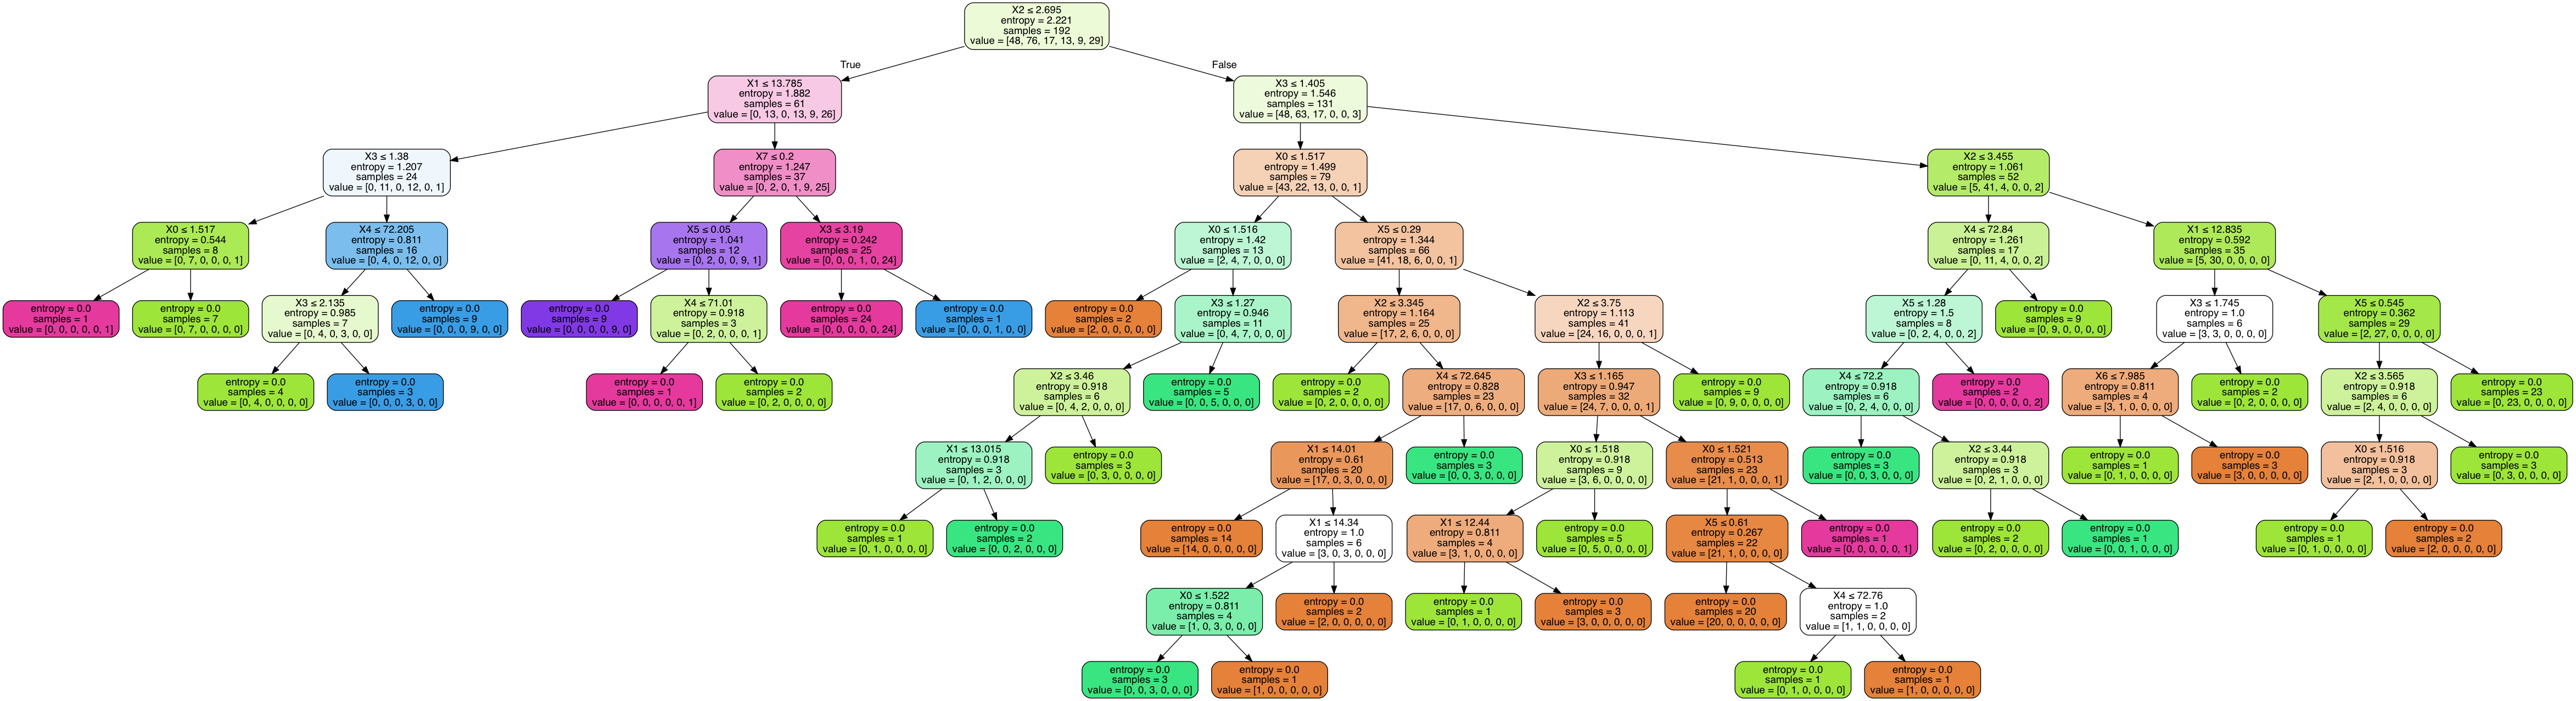

In [5]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())